In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json("/Users/sapir/PycharmProjects/hebnlp_project/data/processed_data/processed_before_NEMO.json")
dti = pd.to_datetime(df[["year", "month", "day", "hour"]], errors="coerce")
df["time"] = dti
print(df["paragraph"].iloc[1])
print(df["filename"].iloc[0])
df

גבר בן שלושים נורה ברחוב העלייה בלוד, מצבו קשה. חובשי מגן דוד אדום טיפלו בזירה, ופינו אותו כשהכרתו מעורפלת, למרכז הרפואי שמיר אסף הרופא. 
/Users/sapir/PycharmProjects/hebnlp_project/data/2019/20-00/אוקטובר/071019 שני+ שירז.docx


,paragraph,hour,day,month,year,filename,time
0,"תם שימוע ראש הממשלה, בינימין נתניהו: לאחר עשר ...",21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,2019-10-07 21:00:00
1,"גבר בן שלושים נורה ברחוב העלייה בלוד, מצבו קשה...",21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,2019-10-07 21:00:00
2,"הרמטכ""ל, רב אלוף אביב כוכבי, מזהיר הערב: ""לא נ...",21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,2019-10-07 21:00:00
3,שר התחבורה בצלאל סמוטריץ' הודיע בעמוד הפייסבוק...,21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,2019-10-07 21:00:00
4,נשיא ארצות הברית טראמפ הודיע כי יציב קווים אדו...,21,7,10,2019,/Users/sapir/PycharmProjects/hebnlp_project/da...,2019-10-07 21:00:00
...,...,...,...,...,...,...,...
5140,הלימודים לא מתחדשים לפחות עד מחרתיים - רק הערב...,8,9,2,2021,/Users/sapir/PycharmProjects/hebnlp_project/da...,2021-02-09 08:00:00
5141,בחירות אלפיים עשרים ואחת: יושב ראש ימינה חבר ה...,8,9,2,2021,/Users/sapir/PycharmProjects/hebnlp_project/da...,2021-02-09 08:00:00
5142,המחדל בנבטים: במהלך הלילה אותרה הנקודה בגדר שמ...,8,9,2,2021,/Users/sapir/PycharmProjects/hebnlp_project/da...,2021-02-09 08:00:00
5143,"הדיונים על פתיחת המסחר באמצעות ""הדרכון הירוק"" ...",8,9,2,2021,/Users/sapir/PycharmProjects/hebnlp_project/da...,2021-02-09 08:00:00


## Data Statistics

### Statistics of number of paragraphs per news report

In [2]:
# Number of paragraphs per news report
frequencies_df = df["time"].value_counts()
print(frequencies_df)

# drop files with 1 detected paragraph - error
# Average number of paragraph per news report
df["time"].value_counts().mean()

2019-06-30 08:00:00    10
2020-04-01 08:00:00    10
2020-03-18 08:00:00     9
2019-06-20 08:00:00     9
2020-02-05 08:00:00     9
                       ..
2019-05-30 08:00:00     2
2020-01-28 21:00:00     2
2019-09-17 08:00:00     2
2019-11-12 08:00:00     1
2019-08-08 08:00:00     1
Name: time, Length: 883, dtype: int64


5.374858437146093

### One Sample

In [3]:
aa=df.iloc[1,0]
print(aa)

גבר בן שלושים נורה ברחוב העלייה בלוד, מצבו קשה. חובשי מגן דוד אדום טיפלו בזירה, ופינו אותו כשהכרתו מעורפלת, למרכז הרפואי שמיר אסף הרופא. 


### Stopwords analysis

In [4]:
def get_hebrew_stopwords(top_k):
    stop_path="../added_material/heb_stopwords.txt"
    with open(stop_path, encoding="utf-8") as in_file:
        lines=in_file.readlines()
        res=[l.strip() for l in lines]
        print(res[:top_k])
    return res

stop = set(get_hebrew_stopwords(10))
paragraph_text = df["paragraph"]

['את', 'לא', 'של', 'אני', 'על', 'זה', 'עם', 'כל', 'הוא', 'אם']


##### Character Length Histogram

In [5]:
def plot_character_length_histogram(text):
    text.str.len().\
        hist()

Character Length Histogram


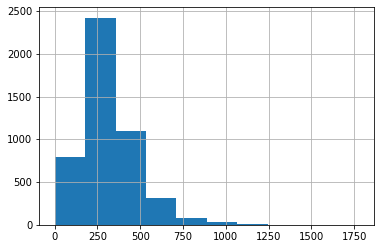

In [6]:
print("Character Length Histogram")
plot_character_length_histogram(paragraph_text)

###### Word Number Histogram

In [7]:
import matplotlib.pyplot as plt

In [8]:
def plot_word_number_histogram(text):
    fig, axs = plt.subplots()
    axs.set_xlabel("Words Count")
    axs.set_ylabel("Number of Paragraphs")
    axs.set_title("Distribution of Words Count")
    text.str.split().\
        map(lambda x: len(x)).\
        hist()
    plt.savefig("word_count_distribution.png", dpi=300)
    
def average_word_number(text):
    return text.str.split().apply(len).\
        mean()

mean:54.3941052631579


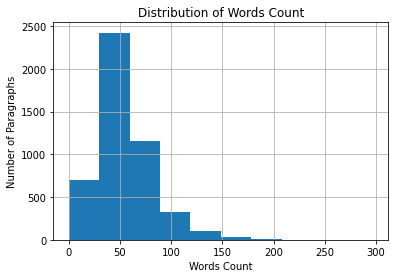

In [9]:
plot_word_number_histogram(paragraph_text)
print("mean:" + str(average_word_number(paragraph_text)))

##### Top Stopwords Barchart

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def plot_top_stopwords_barchart(text, stop):
    #stop=set(stopwords.words('english'))
    #stop=set(get_hebrew_stopwords())
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    x=[w[::-1] for w in x]
    plt.bar(x,y)

In [11]:
def invert_words(words):
    return [w[::-1] for w in words]

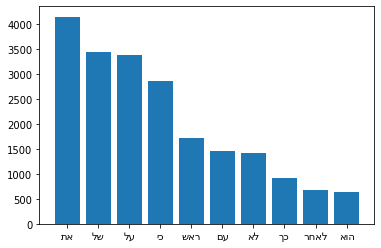

In [12]:
plot_top_stopwords_barchart(paragraph_text, stop)

#### Top Non-Stopwords Barchart

In [29]:
import seaborn as sns
from collections import  Counter

def plot_top_non_stopwords_barchart(text, stop):
    #stop=set(get_hebrew_stopwords())
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:30]:
        if (word not in stop) and word != "-":
            x.append(word)
            y.append(count)
    fig, ax = plt.subplots()
    sns.barplot(x=y,y=invert_words(x), ax=ax)
    plt.savefig("stopwords.png", dpi=300)
    return most

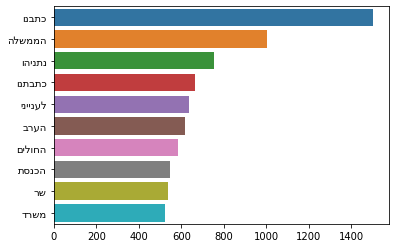

In [ ]:
most = plot_top_non_stopwords_barchart(paragraph_text, stop)

###### Stopwords in Evening Only:

In [ ]:
evening_df = df.loc[df['hour'] == 21]
evening_text = evening_df["paragraph"]
plot_top_non_stopwords_barchart(evening_text, stop)

###### Stopwords in Morning Only:

In [ ]:
morning_df = df.loc[df['hour'] == 8]
morning_text = morning_df["paragraph"]
plot_top_non_stopwords_barchart(morning_text, stop)

# Top N-grams Barchart


In [32]:
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n, file_name):
    #stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    fig, ax = plt.subplots()
    sns.barplot(x=y,y=invert_words(x), ax=ax)
    plt.savefig(file_name, dpi=300)

### Bigrams

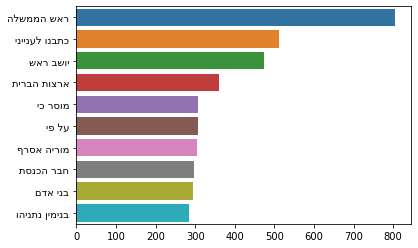

In [33]:
plot_top_ngrams_barchart(paragraph_text,2, "bigrams.png")

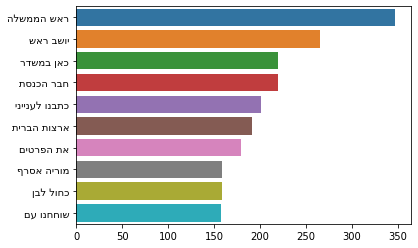

In [34]:
plot_top_ngrams_barchart(morning_text,2, "trigrams.png")

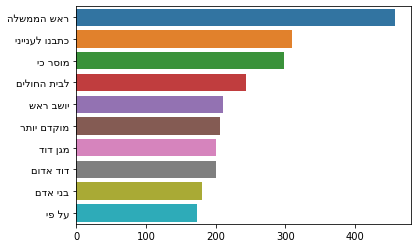

In [20]:
plot_top_ngrams_barchart(evening_text,2)

### Trigrams

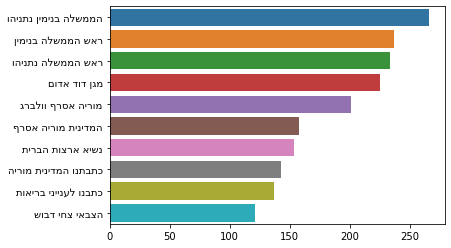

In [21]:
plot_top_ngrams_barchart(paragraph_text,3)